<a href="https://colab.research.google.com/github/Fawwazs17/Cat-Dog/blob/main/ML2TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Load the Cats vs Dogs dataset
dataset, info = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

# Split the dataset into training and testing sets
train_ds = dataset["train"].take(18000)  # First 18,000 images for training
test_ds = dataset["train"].skip(18000)   # The rest for testing

# Resize and normalize images
IMG_SIZE = 180
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize
    return image, label

train_ds = train_ds.map(format_image).batch(BATCH_SIZE).shuffle(1000)
test_ds = test_ds.map(format_image).batch(BATCH_SIZE)

print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(2, activation="softmax")  # Output layer (2 classes: cat & dog)
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Model built successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model built successfully!


In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds, verbose=1)

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.6190 - loss: 0.6606 - val_accuracy: 0.7163 - val_loss: 0.5496
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7606 - loss: 0.4945 - val_accuracy: 0.7586 - val_loss: 0.4922
Epoch 3/10
562/563 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8061 - loss: 0.4140Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.8603 - loss: 0.3273 - val_accuracy: 0.8105 - val_loss: 0.4545
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.9110 - loss: 0.2249 - val_accuracy: 0.7989 - val_loss: 0.5412
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9489 - loss: 0.1389Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.9772 - loss: 0.0637 - val_accuracy: 0.8031 - val_loss: 0.8138
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.9887 - loss: 0.0366 - val_accuracy: 0.7986 - val_loss: 0.8052
Epoch 9/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 78s

In [ ]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc * 100:.2f}%")

165/165 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.8024 - loss: 1.1825
Test Accuracy: 80.14%


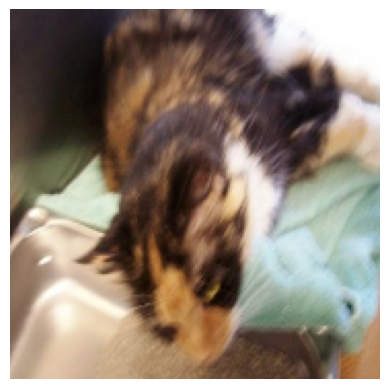

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Cat


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images from the test dataset
for images, labels in test_ds.take(1):
    sample_image = images[0]  # Take the first image from the batch
    sample_label = labels[0]

# Show the image
plt.imshow(sample_image)
plt.axis("off")
plt.show()

# Predict the class
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = tf.argmax(predictions[0]).numpy()

# Output prediction
class_names = ["Cat", "Dog"]
print(f"Predicted Class: {class_names[predicted_class]}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load the image and resize to match the input size of the model
img_path = '/content/drive/My Drive/Colab Notebooks/Cat dog ml/Img/IMG_0416.JPG'  # Make sure to replace this with your image path
img = image.load_img(img_path, target_size=(180, 180))  # Resize as per model input size

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image (to the range [0, 1])

# Add batch dimension (models expect batch dimension even for a single image)
img_array = tf.expand_dims(img_array, 0)

# Predict the class of the image
predictions = model.predict(img_array)

# Output the predictions
print("Predictions (probabilities):", predictions)

# Determine which class has the higher probability
if predictions[0][0] > predictions[0][1]:
    print("The image is a cat.")
else:
    print("The image is a dog.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions (probabilities): [[1.0000000e+00 1.2099574e-17]]
The image is a cat.


In [25]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load the image and resize to match the input size of the model
img_path = '/content/drive/My Drive/Colab Notebooks/Cat dog ml/Img/IMG_0417.jpeg'  # Make sure to replace this with your image path
img = image.load_img(img_path, target_size=(180, 180))  # Resize as per model input size

# Convert image to numpy array and normalize
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image (to the range [0, 1])

# Add batch dimension (models expect batch dimension even for a single image)
img_array = tf.expand_dims(img_array, 0)

# Predict the class of the image
predictions = model.predict(img_array)

# Output the predictions
print("Predictions (probabilities):", predictions)

# Determine which class has the higher probability
if predictions[0][0] > predictions[0][1]:
    print("The image is a cat.")
else:
    print("The image is a dog.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predictions (probabilities): [[0.04375089 0.95624906]]
The image is a dog.
